In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

file_paths = ["Real-Time_Generation-01102023-31122023.csv","Real-Time_Generation-01012024-31032024.csv", "Real-Time_Generation-01042024-30062024.csv", "Real-Time_Generation-01072024-30092024.csv"]
dfs = [pd.read_csv(file, sep = ";", parse_dates=['Date']) for file in file_paths]
df = pd.concat(dfs, ignore_index=True)
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Hour'], dayfirst = True)
df = df.set_index('Datetime')
df = df.drop(columns=['Date', 'Hour'])
df

,Total,Natural Gas,Dammed Hydro,Lignite,River,Import Coal,Wind,Solar,Fuel Oil,Geothermal,Asphaltite Coal,Black Coal,Biomass,Naphta,LNG,Import-Export,Waste Heat
Datetime,,,,,,,,,,,,,,,,,
2023-10-01 00:00:00,32073.18,7054.48,4631.89,4140.00,1041.80,9850.10,2627.93,0.00,82.87,1123.88,225.21,401.97,893.36,0,0,-103.68,103.37
2023-10-01 01:00:00,30684.62,6256.16,3811.07,4067.53,914.71,9697.44,2753.78,0.00,82.38,1120.43,218.59,393.97,874.40,0,0,395.24,98.92
2023-10-01 02:00:00,29616.10,5947.71,3107.93,4104.83,885.41,9594.75,2640.02,0.00,82.57,1121.87,220.79,392.97,900.03,0,0,518.46,98.76
2023-10-01 03:00:00,28698.29,5160.61,2909.27,4165.42,832.98,9562.54,2709.88,0.00,83.38,1133.83,218.59,398.07,907.38,0,0,517.82,98.52
2023-10-01 04:00:00,28346.92,4932.34,2905.89,4167.56,848.35,9165.96,3002.17,0.00,83.38,1139.58,220.79,398.85,897.43,0,0,493.01,91.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30 19:00:00,41859.65,6902.04,11474.36,5172.04,1526.05,10027.94,4415.21,0.01,88.65,1172.74,223.00,594.78,952.05,0,0,-755.12,65.90
2024-09-30 20:00:00,40650.70,6879.05,10706.88,5232.78,1453.12,9975.10,3936.87,0.01,87.85,1188.09,220.80,598.53,958.06,0,0,-654.76,68.32
2024-09-30 21:00:00,39241.91,6674.91,10216.22,5347.11,1238.28,9917.40,3397.20,0.01,87.94,1212.19,218.88,590.84,948.09,0,0,-674.66,67.50


In [61]:
total_sum = df["Total"].sum()
percentage = (df.sum() / total_sum) * 100
percentage_df = pd.DataFrame(percentage, columns=['Percentage'])
sorted_percentage = percentage_df.sort_values(by='Percentage', ascending=False)
print(sorted_percentage)

                 Percentage
Total            100.000000
Import Coal       23.054548
Dammed Hydro      18.387157
Natural Gas       18.312038
Lignite           13.106647
Wind              11.229639
River              5.727530
Geothermal         3.188142
Biomass            2.689718
Solar              1.571427
Black Coal         1.452934
Import-Export      0.453888
Asphaltite Coal    0.366763
Fuel Oil           0.230466
Waste Heat         0.229102
LNG                0.000000
Naphta             0.000000


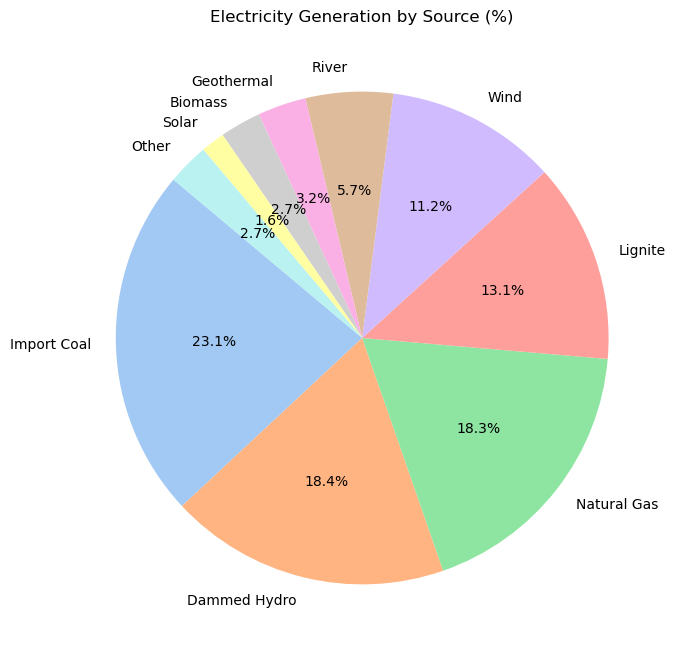

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette("pastel", len(simplified_percentage))
threshold = 1.5 
large_percentages = sorted_percentage[sorted_percentage['Percentage'] >= threshold]
small_percentages = sorted_percentage[sorted_percentage['Percentage'] < threshold]

other_percentage = pd.DataFrame({'Percentage': [small_percentages['Percentage'].sum()]}, index=['Other'])
simplified_percentage = pd.concat([large_percentages, other_percentage])

plt.figure(figsize=(10, 8))
plt.pie(
    simplified_percentage['Percentage'],
    labels=simplified_percentage.index,
    autopct=lambda p: f'{p:.1f}%' if p >= threshold else '', 
    startangle=140,
    colors=colors
)
plt.title('Electricity Generation by Source (%)')
plt.show()


In [136]:
(df == 0).sum()

Total                 0
Natural Gas           0
Dammed Hydro          0
Lignite               0
River                 0
Import Coal           0
Wind                  0
Solar               432
Fuel Oil              0
Geothermal            0
Asphaltite Coal    2276
Black Coal            0
Biomass               0
Naphta             8784
LNG                8784
Import-Export       343
Waste Heat            0
dtype: int64

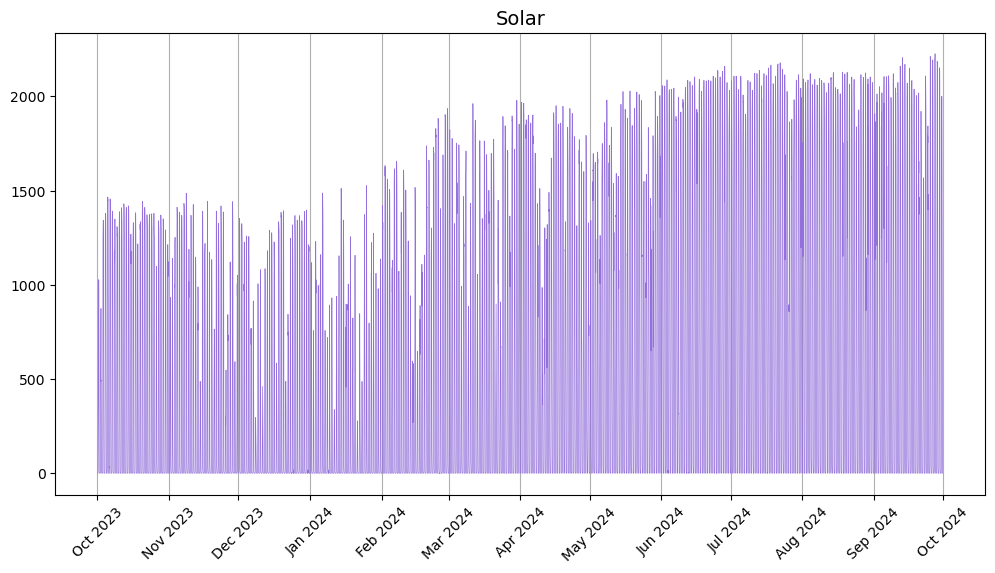

In [105]:
solar = df[["Solar"]]
plt.figure(figsize=(12, 6))
plt.plot(solar["Solar"], color = "mediumpurple",linewidth=0.5)
plt.title("Solar", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

/var/folders/q3/cysqcg6n4hz8c1q95sp_ygfc0000gn/T/ipykernel_45776/3260082304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar.loc[:, 'Month'] = solar.index.month


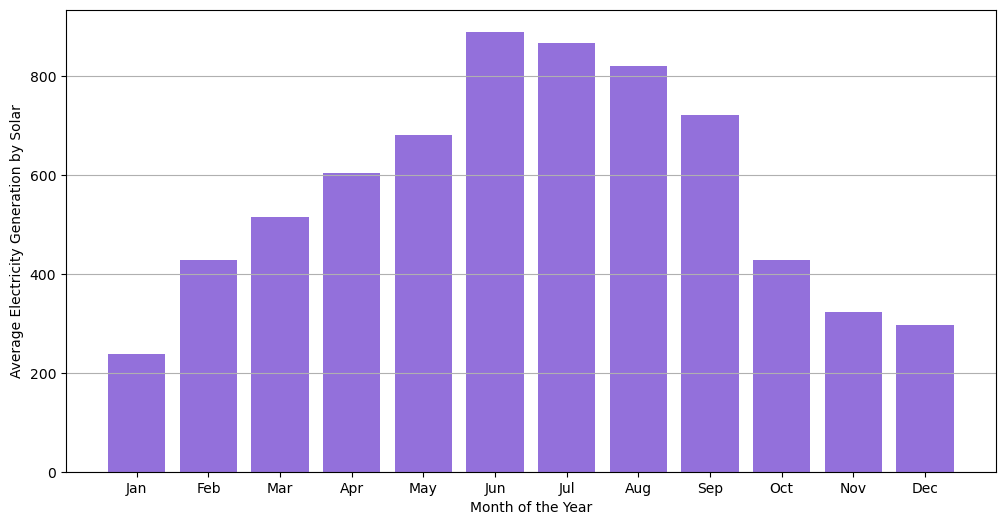

In [133]:
solar.loc[:, 'Month'] = solar.index.month

monthly_avg_solar = solar.groupby('Month').mean()

plt.figure(figsize=(12, 6))
plt.bar(monthly_avg_solar.index, monthly_avg_solar['Solar'], color = "mediumpurple")  
plt.xlabel('Month of the Year')
plt.ylabel('Average Electricity Generation by Solar')
plt.xticks(monthly_avg_solar.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  
plt.grid(axis='y') 

plt.show()


/var/folders/q3/cysqcg6n4hz8c1q95sp_ygfc0000gn/T/ipykernel_45776/1322358846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solar.loc[:, 'Hour'] = solar.index.hour


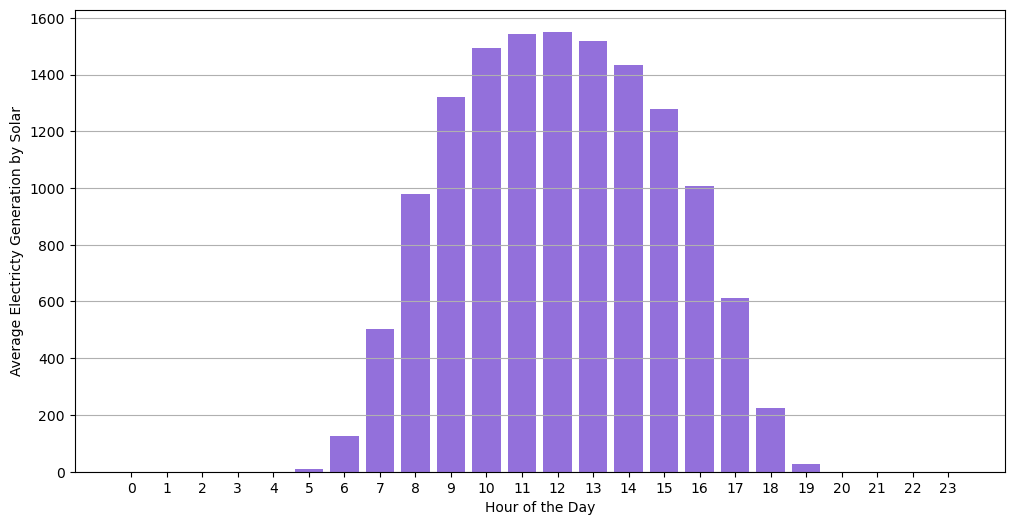

In [134]:
solar.loc[:, 'Hour'] = solar.index.hour
hourly_avg_solar = solar.groupby('Hour').mean()

plt.figure(figsize=(12, 6))
plt.bar(hourly_avg_solar.index, hourly_avg_solar['Solar'], color = "mediumpurple")  
plt.xlabel('Hour of the Day')
plt.ylabel('Average Electricty Generation by Solar')
plt.xticks(hourly_avg_solar.index)  
plt.grid(axis='y') 
plt.show()

In [54]:
asphaltite_coal = df[["Asphaltite Coal"]]
asphaltite_coal

,Asphaltite Coal
Datetime,
2023-10-01 00:00:00,225.21
2023-10-01 01:00:00,218.59
2023-10-01 02:00:00,220.79
2023-10-01 03:00:00,218.59
2023-10-01 04:00:00,220.79
...,...
2024-09-30 19:00:00,223.00
2024-09-30 20:00:00,220.80
2024-09-30 21:00:00,218.88


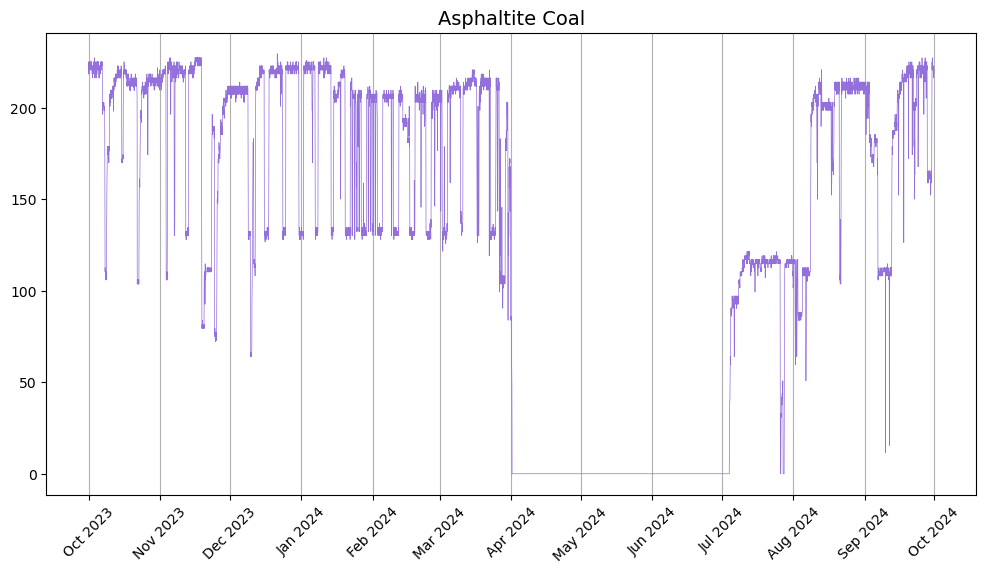

In [94]:
plt.figure(figsize=(12, 6))
plt.plot(asphaltite_coal, color = "mediumpurple",linewidth=0.5)
plt.title("Asphaltite Coal", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

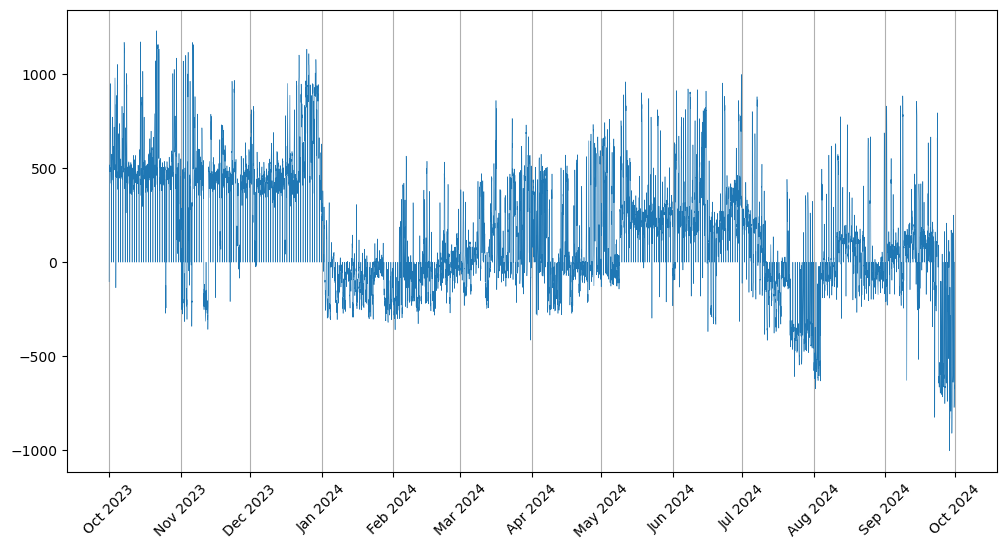

In [58]:
import_export = df[["Import-Export"]]
plt.figure(figsize=(12, 6))
plt.plot(import_export, linewidth=0.4)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

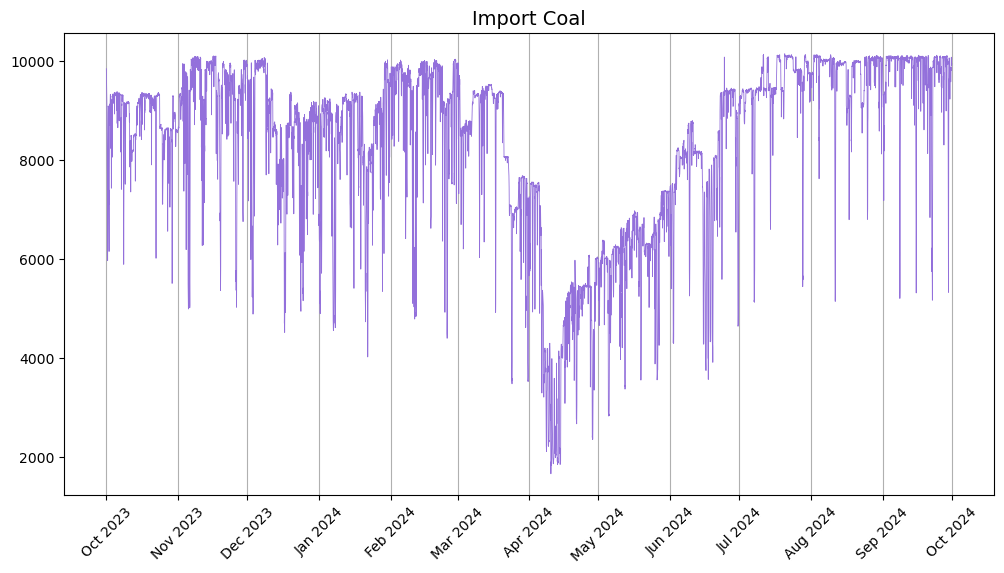

In [92]:
import_coal = df[["Import Coal"]]
plt.figure(figsize=(12, 6))
plt.plot(import_coal,color = "mediumpurple", linewidth=0.6)
plt.title("Import Coal", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

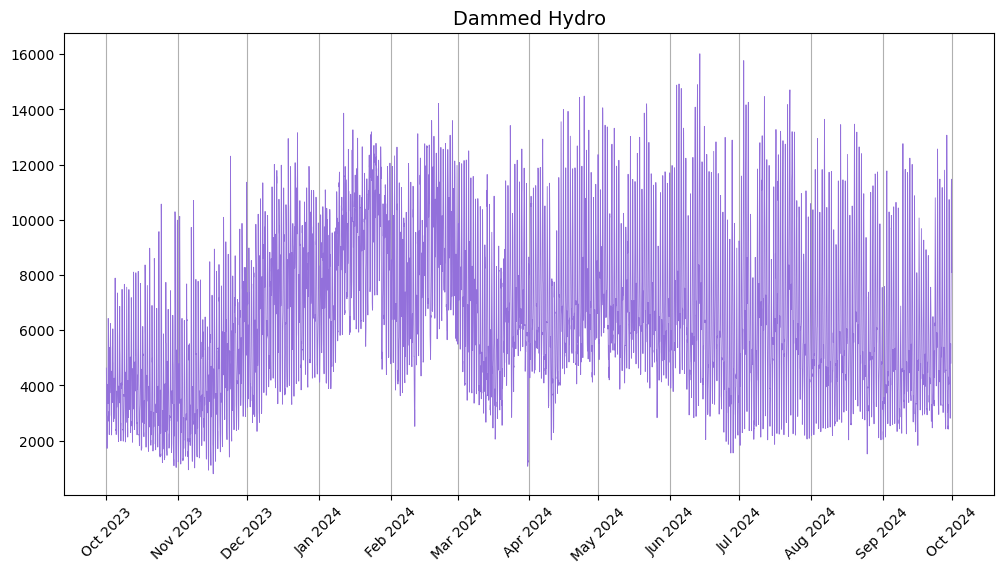

In [100]:
dammed_hydro = df[["Dammed Hydro"]]
plt.figure(figsize=(12, 6))
plt.plot(dammed_hydro, color = "mediumpurple",linewidth=0.6)
plt.title("Dammed Hydro", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

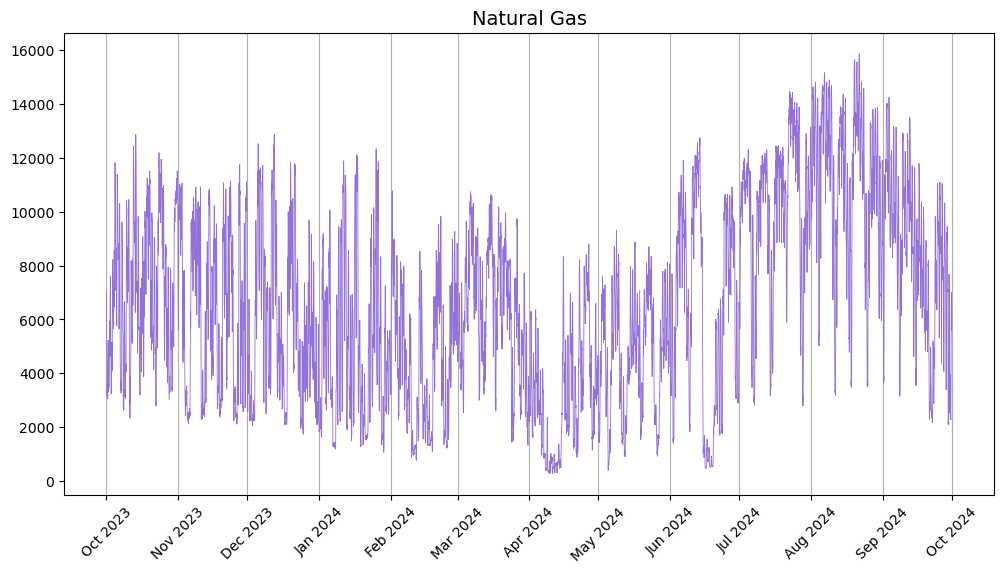

In [98]:
natural_gas = df[["Natural Gas"]]
plt.figure(figsize=(12, 6))
plt.plot(natural_gas, color = "mediumpurple",linewidth=0.6)
plt.title("Natural Gas", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

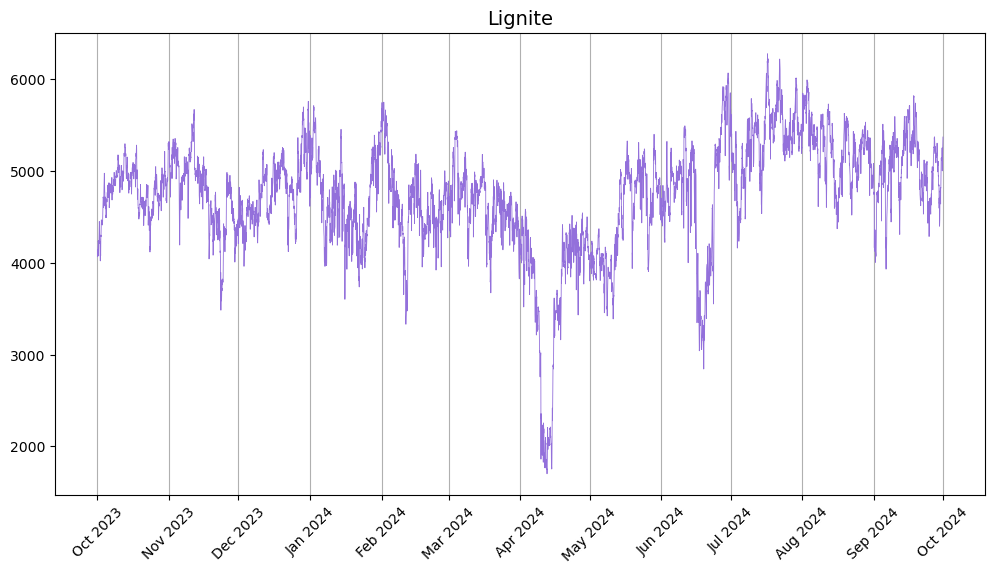

In [90]:
lignite = df[["Lignite"]]
plt.figure(figsize=(12, 6))
plt.plot(lignite,color = "mediumpurple", linewidth=0.6)
plt.title("Lignite", fontsize=14)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

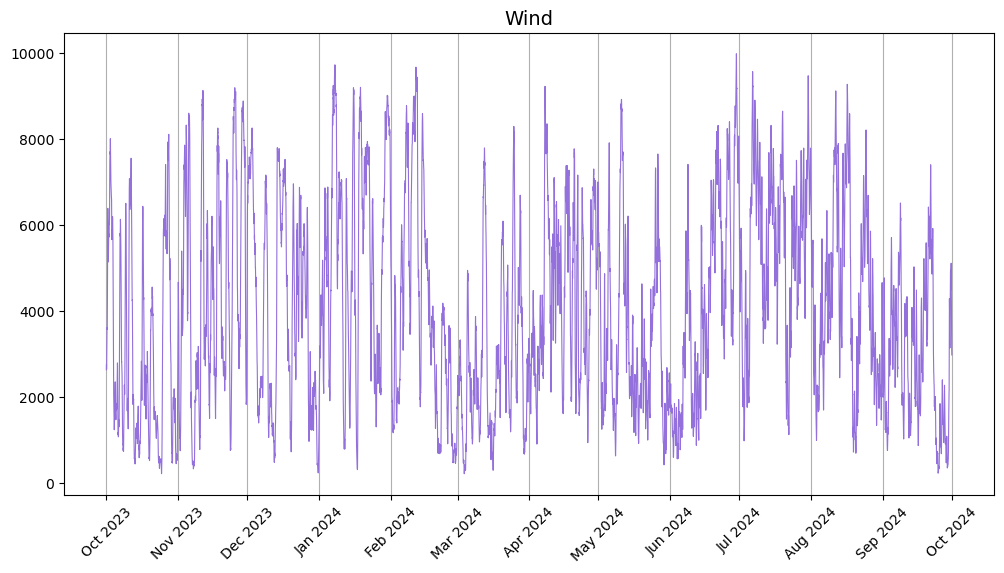

In [102]:
wind = df[["Wind"]]
plt.figure(figsize=(12, 6))
plt.plot(wind, color ="mediumpurple",linewidth=0.8)
plt.title("Wind", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

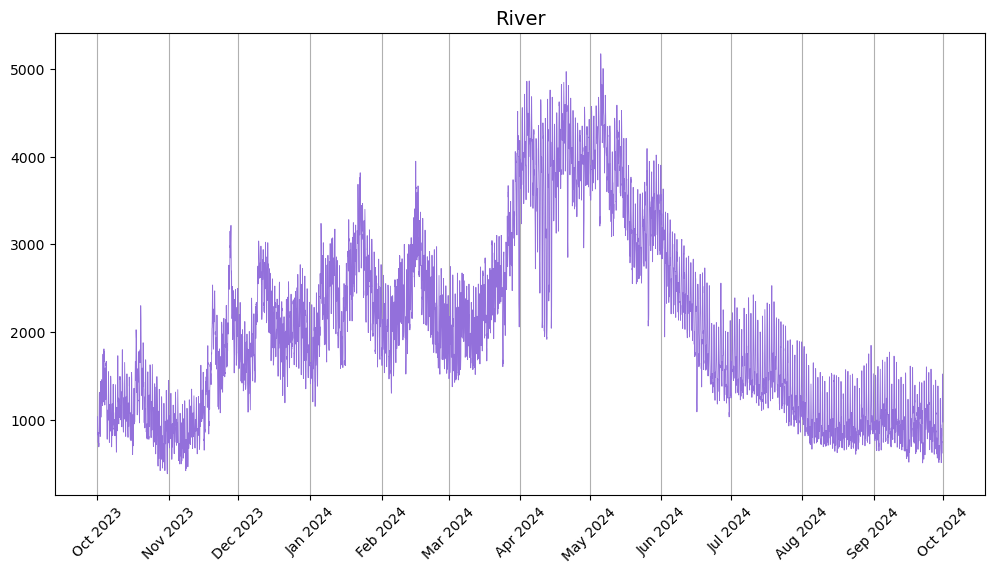

In [99]:
river = df[["River"]]
plt.figure(figsize=(12, 6))
plt.plot(river, color = "mediumpurple",linewidth=0.6)
plt.title("River", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

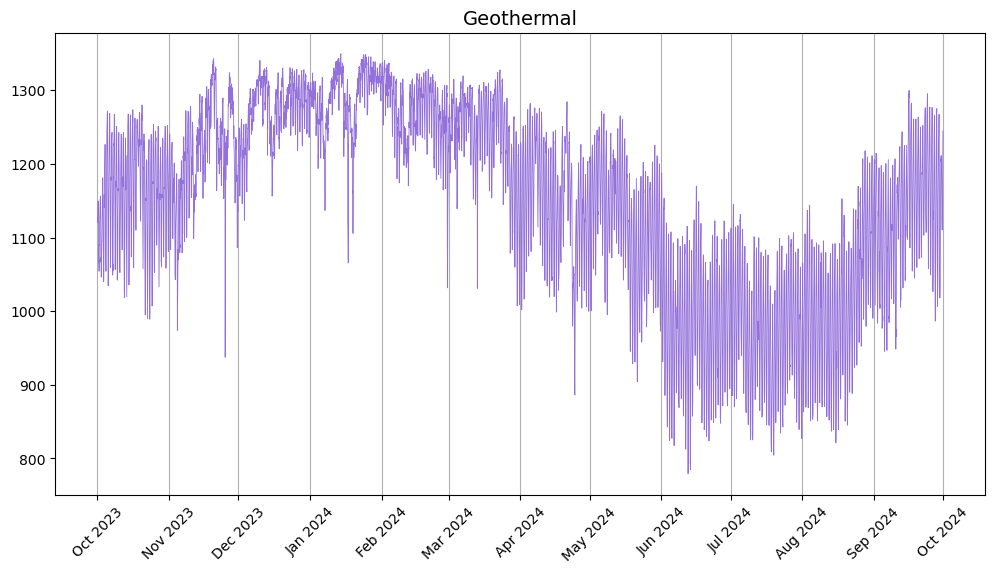

In [103]:
geothermal = df[["Geothermal"]]
plt.figure(figsize=(12, 6))
plt.plot(geothermal,color = "mediumpurple", linewidth=0.6)
plt.title("Geothermal", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

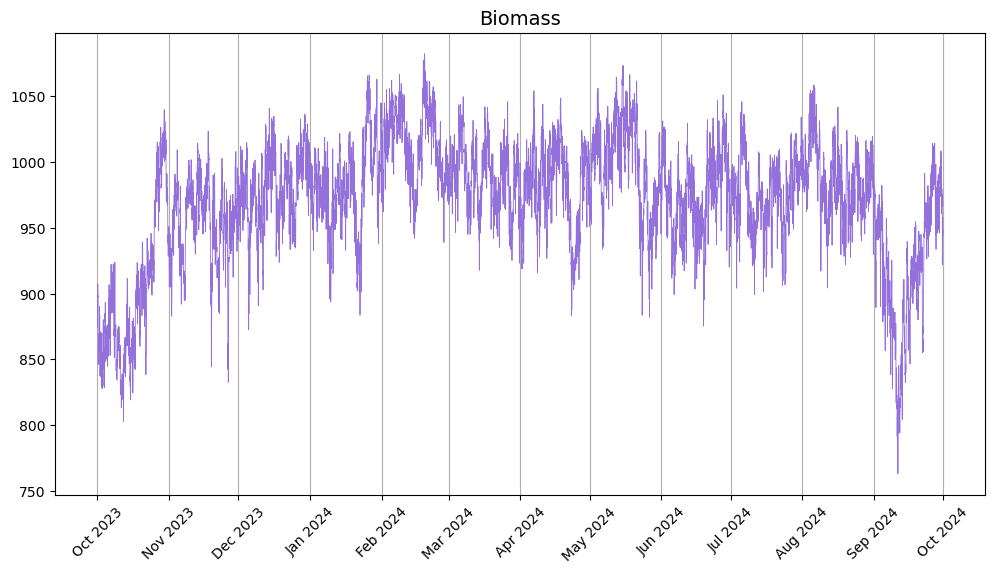

In [104]:
biomass = df[["Biomass"]]
plt.figure(figsize=(12, 6))
plt.plot(biomass,color = "mediumpurple", linewidth=0.6)
plt.title("Biomass", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

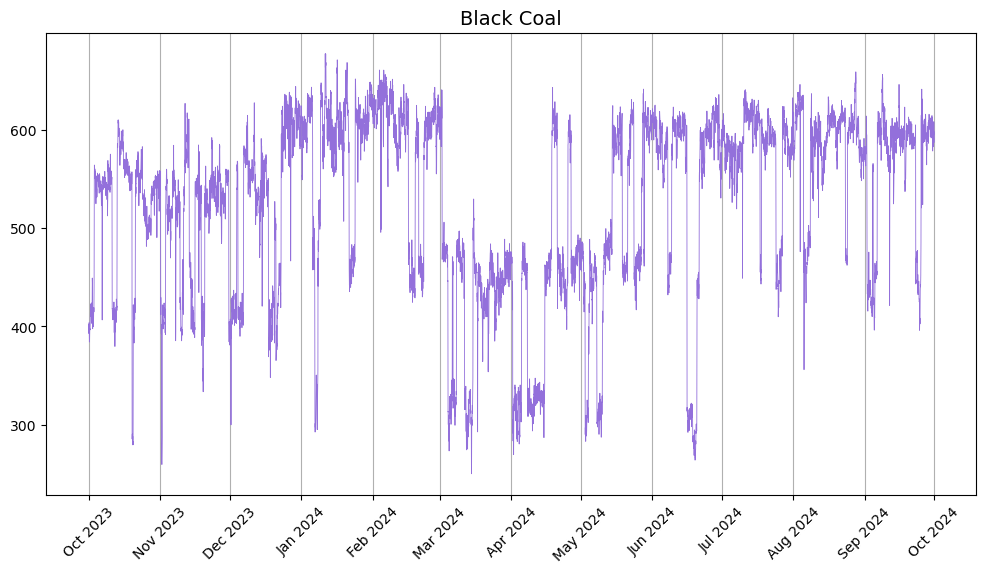

In [97]:
black_coal = df[["Black Coal"]]
plt.figure(figsize=(12, 6))
plt.plot(black_coal, color = "mediumpurple" ,linewidth=0.6)
plt.title("Black Coal", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

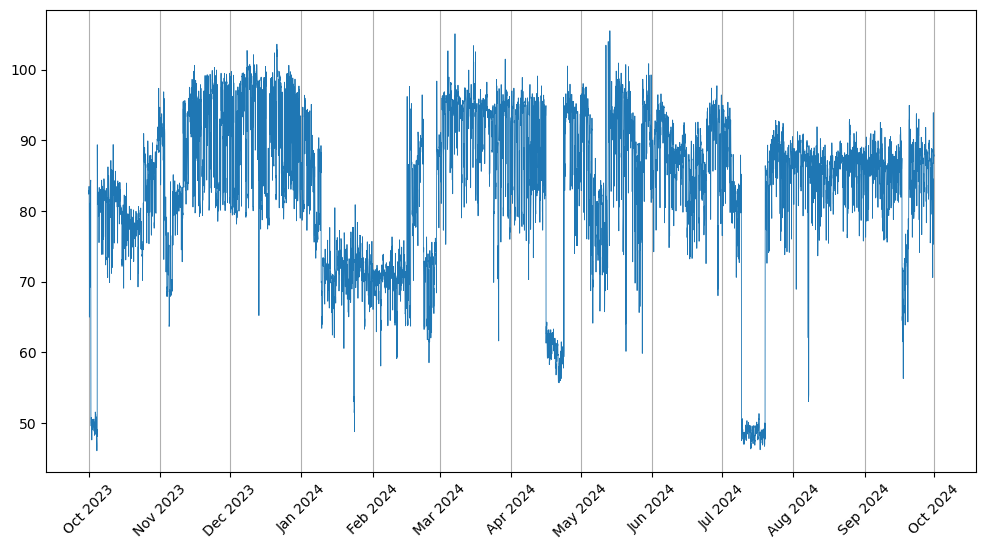

In [73]:
fuel_oil = df[["Fuel Oil"]]
plt.figure(figsize=(12, 6))
plt.plot(fuel_oil, linewidth=0.6)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

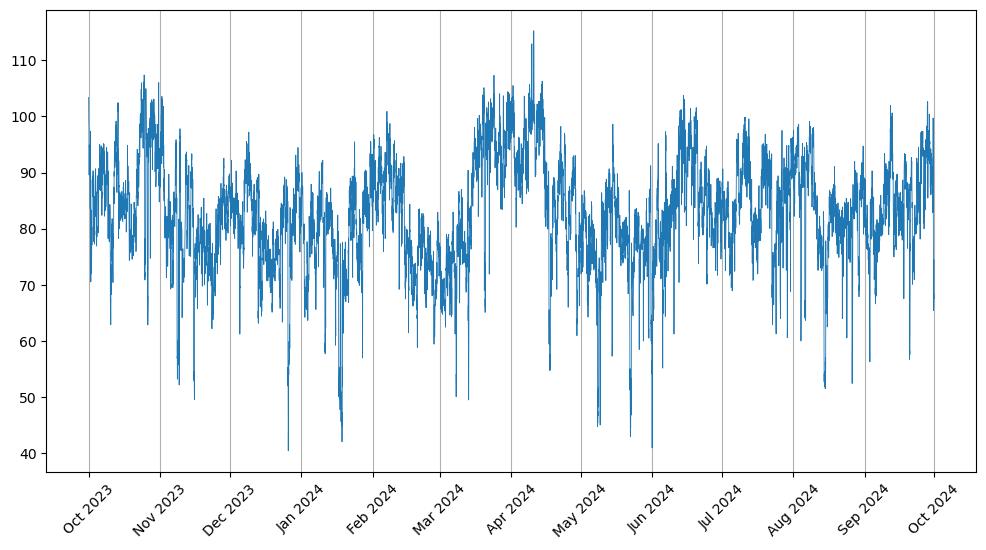

In [74]:
waste_heat = df[["Waste Heat"]]
plt.figure(figsize=(12, 6))
plt.plot(waste_heat, linewidth=0.6)

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

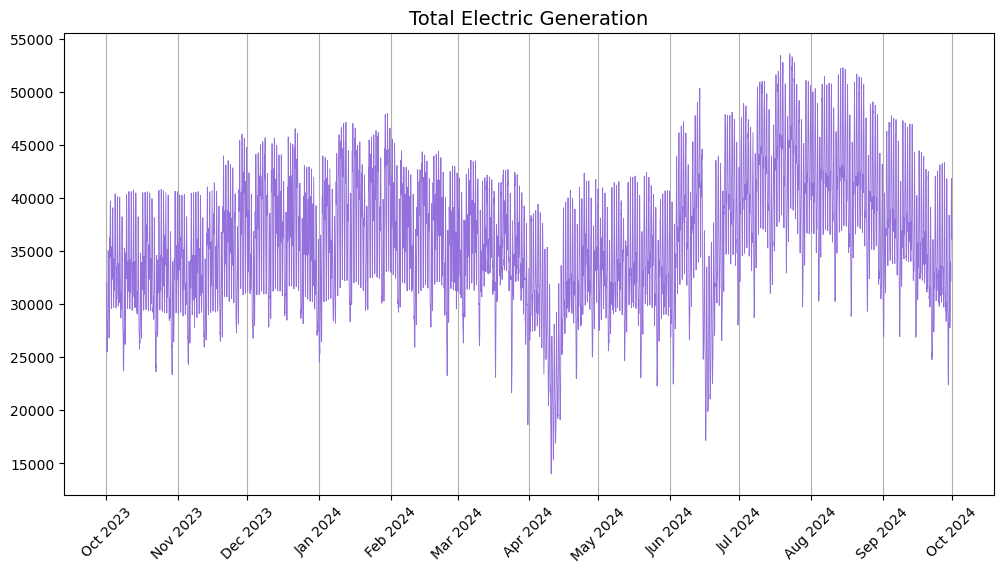

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(df["Total"], color = "mediumpurple",linewidth=0.6)
plt.title("Total Electric Generation", fontsize = 14)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)
plt.gca().xaxis.grid(True, which='major')

plt.show()

In [115]:
stationary_river = df['River'].diff().dropna()
stationary_geothermal = df['Geothermal'].diff().dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller

adfuller(MCP)

In [128]:
columns_to_omit = ["Total", "River", "Geothermal", "LNG", "Naphta"]
df_stationary = df.drop(columns=columns_to_omit)

df_stationary["River"] = stationary_river
df_stationary["Geothermal"] = stationary_geothermal
df_stationary

,Natural Gas,Dammed Hydro,Lignite,Import Coal,Wind,Solar,Fuel Oil,Asphaltite Coal,Black Coal,Biomass,Import-Export,Waste Heat,River,Geothermal
Datetime,,,,,,,,,,,,,,
2023-10-01 00:00:00,7054.48,4631.89,4140.00,9850.10,2627.93,0.00,82.87,225.21,401.97,893.36,-103.68,103.37,NaN,NaN
2023-10-01 01:00:00,6256.16,3811.07,4067.53,9697.44,2753.78,0.00,82.38,218.59,393.97,874.40,395.24,98.92,-127.09,-3.45
2023-10-01 02:00:00,5947.71,3107.93,4104.83,9594.75,2640.02,0.00,82.57,220.79,392.97,900.03,518.46,98.76,-29.30,1.44
2023-10-01 03:00:00,5160.61,2909.27,4165.42,9562.54,2709.88,0.00,83.38,218.59,398.07,907.38,517.82,98.52,-52.43,11.96
2023-10-01 04:00:00,4932.34,2905.89,4167.56,9165.96,3002.17,0.00,83.38,220.79,398.85,897.43,493.01,91.61,15.37,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30 19:00:00,6902.04,11474.36,5172.04,10027.94,4415.21,0.01,88.65,223.00,594.78,952.05,-755.12,65.90,94.84,19.82
2024-09-30 20:00:00,6879.05,10706.88,5232.78,9975.10,3936.87,0.01,87.85,220.80,598.53,958.06,-654.76,68.32,-72.93,15.35
2024-09-30 21:00:00,6674.91,10216.22,5347.11,9917.40,3397.20,0.01,87.94,218.88,590.84,948.09,-674.66,67.50,-214.84,24.10


<Axes: >

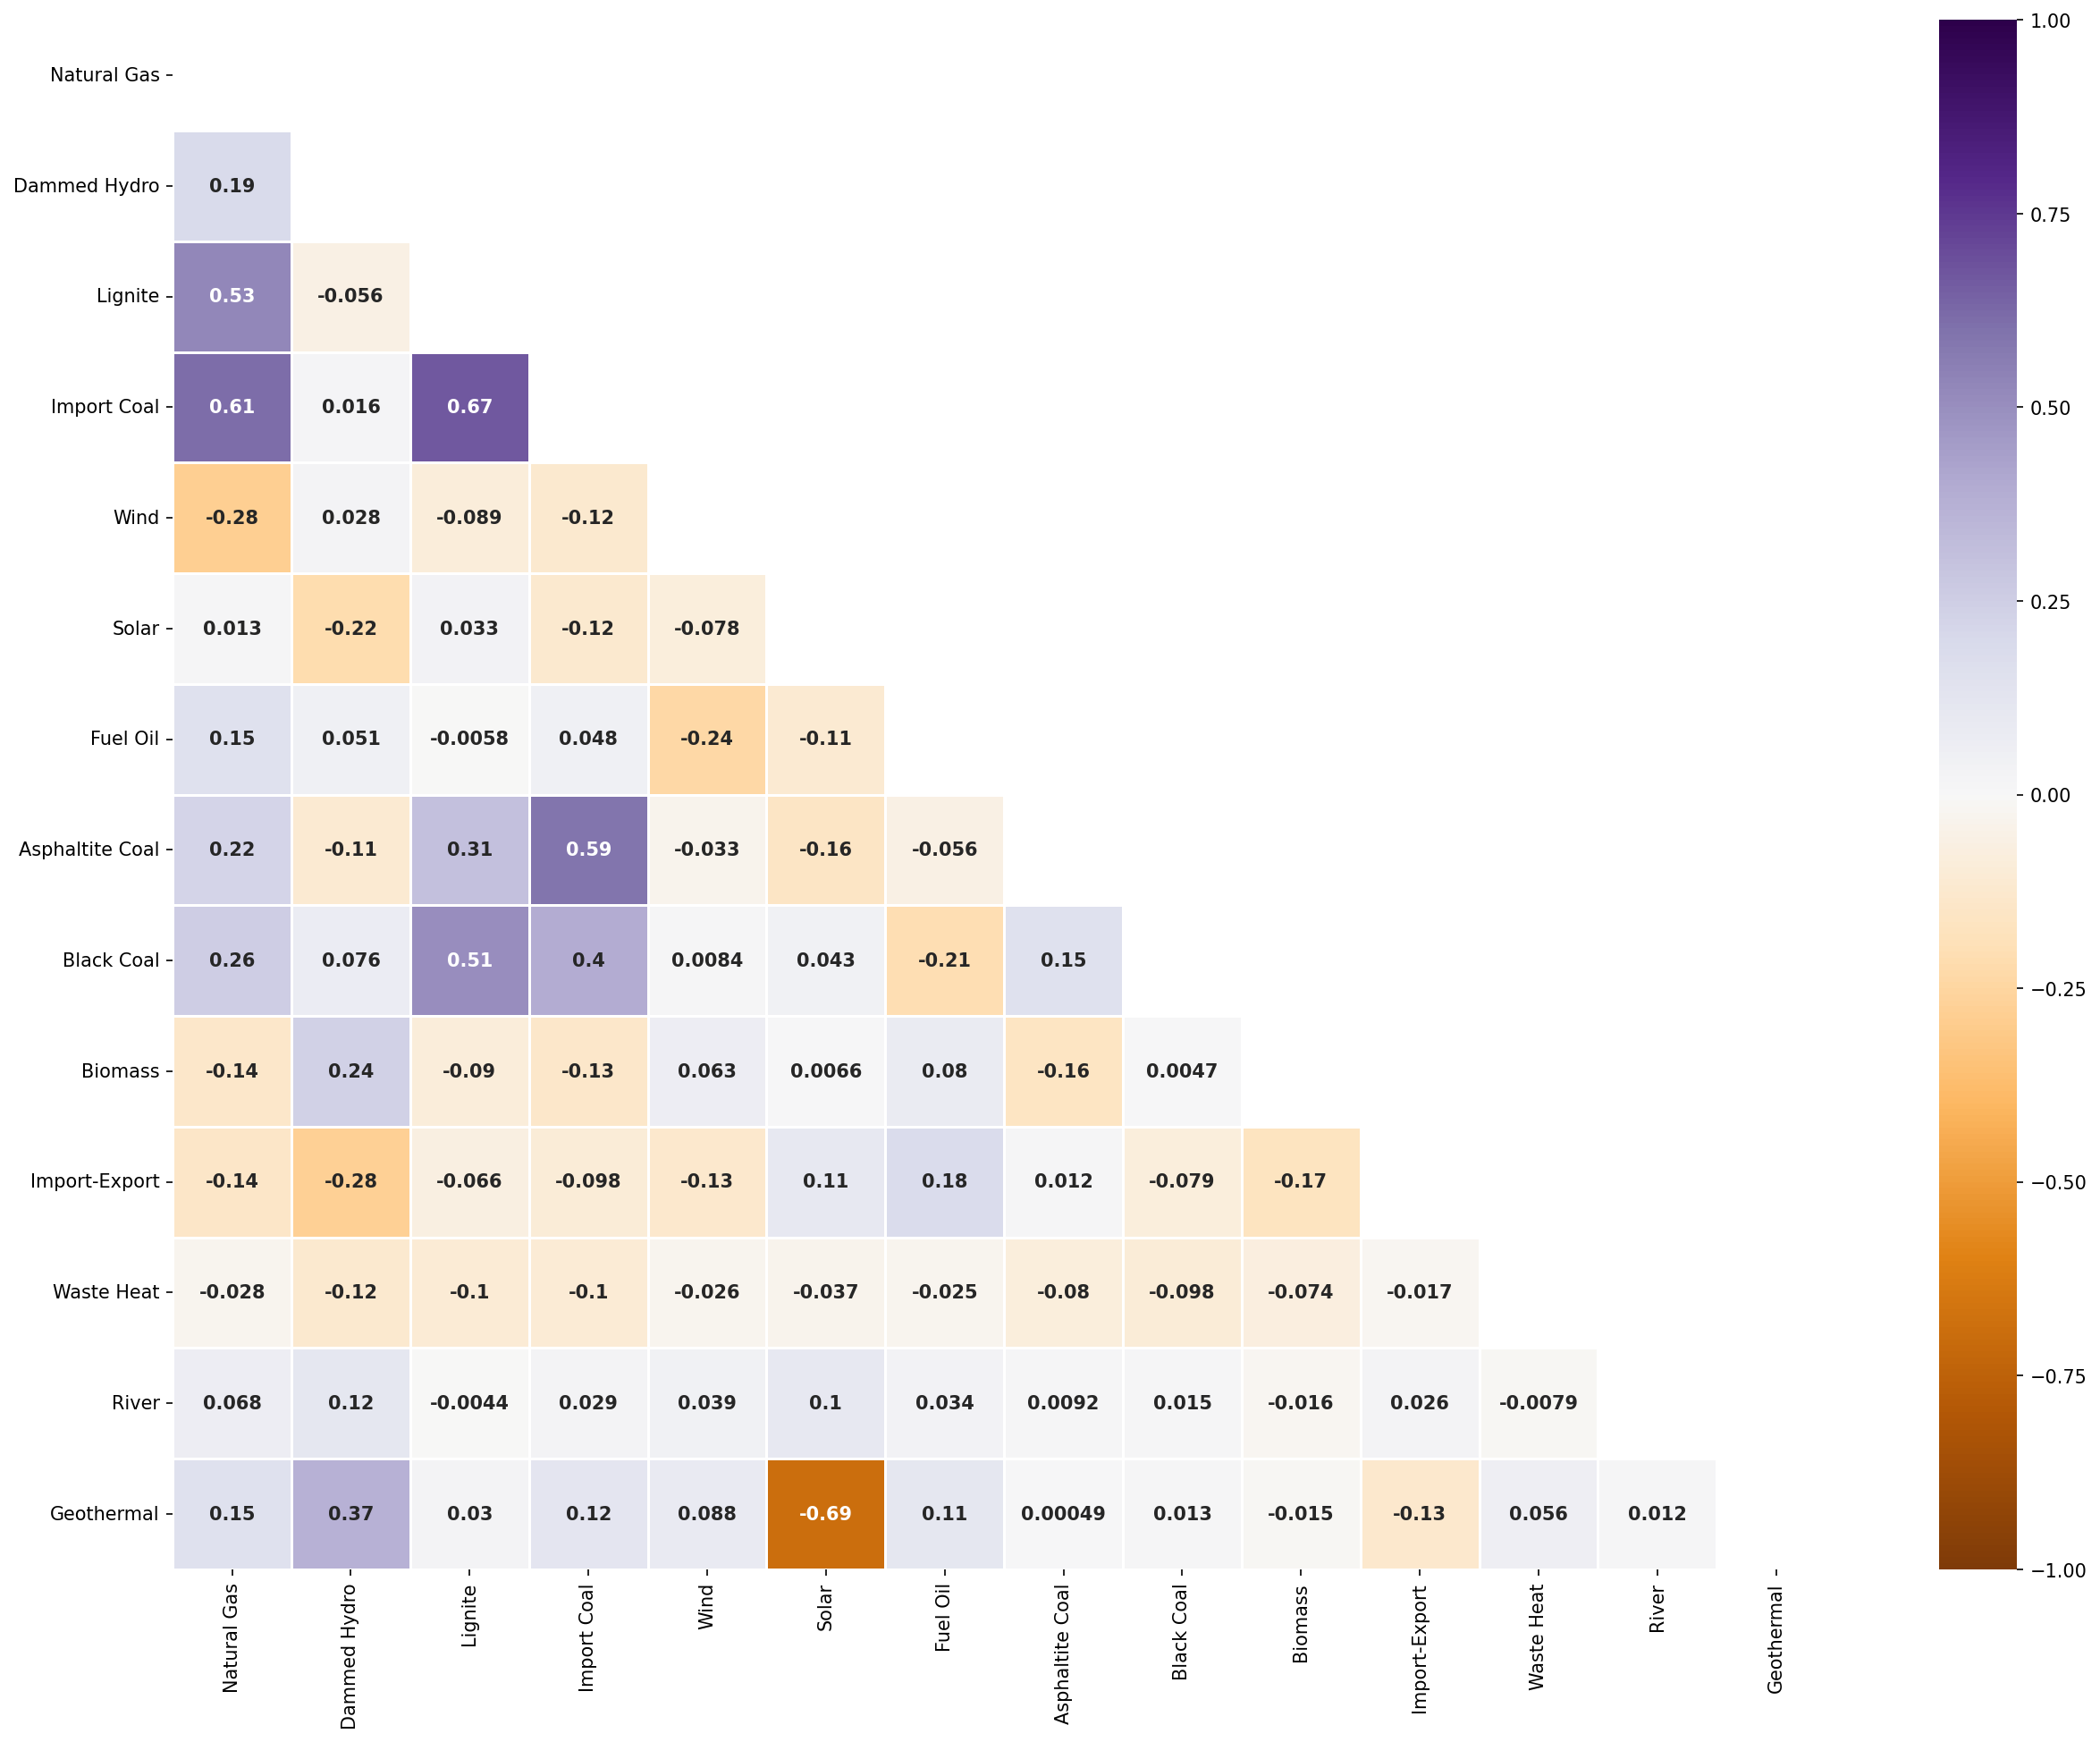

In [130]:
import numpy as np
import seaborn as sns
corr = df_stationary.corr()
matrix = np.triu(corr)
plt.figure(figsize=(20,15), dpi=150) 
sns.heatmap(corr,mask = matrix, vmin = -1, vmax = 1, linewidth = 0.5,cmap ="PuOr",annot = True,annot_kws ={'fontweight':'bold'})

In [144]:
MCP = pd.read_csv("Market_Clearing_Price-01102023-30092024.csv", sep = ";")
MCP['datetime'] = pd.to_datetime(MCP['Date'] + ' ' + MCP['Hour'], format='%d.%m.%Y %H:%M')
MCP.set_index('datetime', inplace=True)
MCP = MCP[["MCP (TL/MWh)"]]
MCP['MCP (TL/MWh)'] = MCP['MCP (TL/MWh)'].replace({',': ''}, regex=True).astype(float)
MCP.head(25)

,MCP (TL/MWh)
datetime,
2023-10-01 00:00:00,2225.00
2023-10-01 01:00:00,1550.00
2023-10-01 02:00:00,1888.88
2023-10-01 03:00:00,1997.08
2023-10-01 04:00:00,1997.08
2023-10-01 05:00:00,2039.99
2023-10-01 06:00:00,2040.01
2023-10-01 07:00:00,1493.99
2023-10-01 08:00:00,1500.00


In [150]:
df_stationary['MCP'] = MCP

df_stationary.corr()['MCP']


Natural Gas        0.732111
Dammed Hydro       0.362333
Lignite            0.443478
Import Coal        0.598377
Wind              -0.220487
Solar             -0.176834
Fuel Oil           0.214189
Asphaltite Coal    0.140836
Black Coal         0.230642
Biomass           -0.049368
Import-Export     -0.110937
Waste Heat        -0.031692
River              0.194673
Geothermal         0.299815
MCP                1.000000
Name: MCP, dtype: float64
